
# Pdf of the log

1. Use numpy to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$.


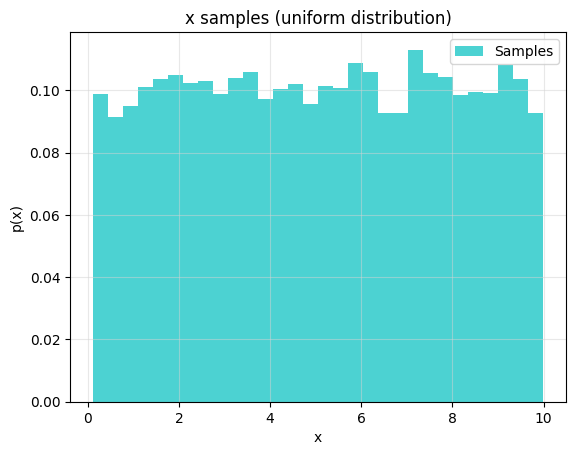

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000

# Extract N samples from the uniform distribution and plot the histogram
x = np.random.uniform(low=0.1, high=10, size = N)
plt.hist(x, bins=30, density=True, color = 'c', alpha = 0.7, histtype = 'stepfilled', label = 'Samples')
plt.title('x samples (uniform distribution)')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.5, color = 'lightgray')
plt.legend()
plt.show()

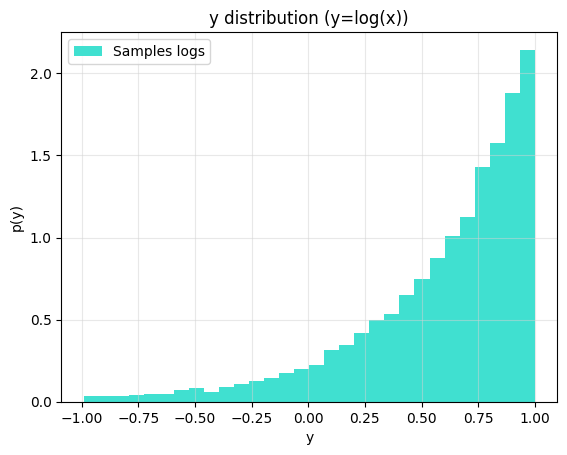

In [6]:
# Compute the log and plot the histogram
y = np.log10(x)
plt.hist(y, bins=30, density=True, color = 'turquoise', histtype = 'stepfilled', label = 'Samples logs')
plt.title('y distribution (y=log(x))')
plt.xlabel('y')
plt.ylabel('p(y)')
plt.grid(alpha=0.5, color = 'lightgray')
plt.legend()
plt.show()

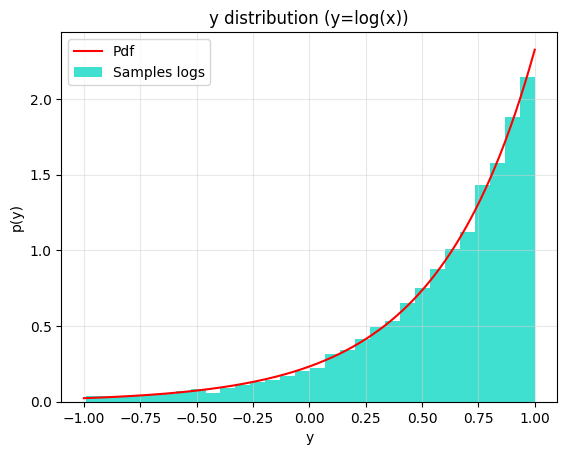

In [7]:
# Theoretical value: p(y) = |dx/dy|p(x), where:
#      p(x) is the uniform distribution: p(x) = 1/(high-low)=1/(10-0.1)
#      p(y) is the log distribution
#      y = logx -> x = 10^y -> |dx/dy| = 10^y * ln(10)
# -> p(y) = (10^y * ln(10))/(10-0.1)

# Define the pdf p(y)
x_axis = np.linspace(-1, 1, 1000)
pdf = 10**x_axis * np.log(10)/(10-0.1)

# Plot p(y) over the y histogram
plt.plot(x_axis, pdf, label='Pdf', color='red')
plt.hist(y, bins=30, density=True, color = 'turquoise', histtype = 'stepfilled', label = 'Samples logs')
plt.title('y distribution (y=log(x))')
plt.xlabel('y')
plt.ylabel('p(y)')
plt.grid(alpha=0.5, color = 'lightgray')
plt.legend()
plt.show()

In [8]:
# log(mean(x)) vs mean(y):
log_mean_x = np.log10(np.mean(x))
mean_y = np.mean(y)
print('Number of samples: ' + str(N))
print('The log of the mean of x is ' + str(log_mean_x))
print('The mean of y is ' + str(mean_y))
print('The values differ by ' + str(abs(log_mean_x - mean_y)))
print()

log_median_x = np.log10(np.median(x))
median_y = np.median(y)
print('The log of the median of x is ' + str(log_median_x))
print('The median of y is ' + str(median_y))
print('The values differ by ' + str(abs(log_median_x - median_y)))
print()


Number of samples: 10000
The log of the mean of x is 0.7049076253230195
The mean of y is 0.589928783499455
The values differ by 0.11497884182356455

The log of the median of x is 0.7066664416229094
The median of y is 0.7066664415128356
The values differ by 1.1007372791027592e-10



As can be seen, the values obtained through the mean are different, while the ones obtained through the median are almost the same.

In the first graph, the values shwon in blue represent, for each N value, |log(mean(x)) - mean(y)|.
For the second graph, instead, they represent |log(median(x)) - median(y)|.


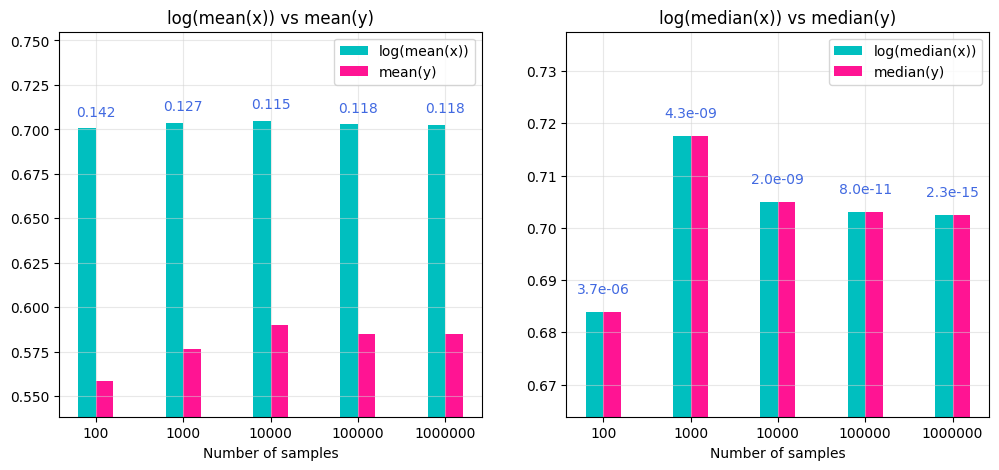

In [20]:
# How do the values change as N increases?

Values = [100, 1000, 10000, 100000, 1000000]

means_x = np.zeros(len(Values))
medians_x = np.zeros(len(Values))
means_y = np.zeros(len(Values))
medians_y = np.zeros(len(Values))

# Compute the means and the medians for each N value
for i, N in enumerate(Values):
    x = np.random.uniform(low=0.1, high=10, size = N)
    y = np.log10(x)

    means_x[i] = np.log10(np.mean(x))
    means_y[i] = np.mean(y)

    medians_x[i] = np.log10(np.median(x))
    medians_y[i] = np.median(y)

# Plotting two bar plots, one with the comparison between the means, one for the medians.
fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 
ticks = np.arange(len(Values))

# For the means:
axs[0].bar([i - 0.1 for i in ticks], means_x, width=0.2, label = 'log(mean(x))', color ='c')
axs[0].bar([i + 0.1 for i in ticks], means_y, width=0.2, label = 'mean(y)', color ='deeppink')
axs[0].set_xticks(ticks)
axs[0].set_xticklabels(Values)
axs[0].set_xlabel('Number of samples')
axs[0].set_ylim(min(min(means_x), min(means_y))-0.02, max(max(means_x),max(means_y))+0.05)
axs[0].set_title('log(mean(x)) vs mean(y)')
axs[0].legend()
axs[0].grid(c='lightgray', alpha=0.5)

for i, x, y in zip(ticks, means_x, means_y):
    # Stamp the difference between log(mean(x)) and mean(y) for each N:
    axs[0].text(i, max(x, y) + 0.005, round(abs(x-y), 3), ha='center', va='bottom', color='royalblue')


axs[1].bar([i - 0.1 for i in ticks], medians_x, width=0.2, label = 'log(median(x))', color ='c')
axs[1].bar([i + 0.1 for i in ticks], medians_y, width=0.2, label = 'median(y)', color ='deeppink')
axs[1].set_xticks(ticks)
axs[1].set_xticklabels(Values)
axs[1].set_xlabel('Number of samples')
axs[1].set_ylim(min(min(medians_x), min(medians_y))-0.02, max(max(medians_x),max(medians_y))+0.02)
axs[1].set_title('log(median(x)) vs median(y)')
axs[1].legend()
axs[1].grid(c='lightgray', alpha=0.5)

for i, x, y in zip(ticks, medians_x, medians_y):
    # Stamp the difference between log(median(x)) and median(y) for each N:
    axs[1].text(i, max(x, y) + 0.003, '{:.1e}'.format(abs(x-y)), ha='center', va='bottom', color='royalblue')

print('In the first graph, the values shwon in blue represent, for each N value, |log(mean(x)) - mean(y)|.')
print('For the second graph, instead, they represent |log(median(x)) - median(y)|.')